# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, gumbel_r, t
import seaborn as sns
# from statsmodels.api import sm

In [2]:
tokyo_data = pd.read_csv('../data/TOKYO_DAILY_CLIMATE_BEST_Jan14May24.csv')

tokyo_data['Date'] = pd.to_datetime(tokyo_data['DATE'], format='%Y-%m-%d')
tokyo_data = tokyo_data.set_index('Date')

tokyo_data.head()


,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2014-01-01,47662.0,NaN,RJTD,JPN_47662,TOKYO,35.692,139.751,36.0,2014-01-01,15,9.6
2014-01-02,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-02,15,7.3
2014-01-03,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-03,15,5.9
2014-01-04,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-04,15,6.5
2014-01-05,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2014-01-05,15,5.4


In [3]:
tokyo_data.tail()

,WMO,WBAN,ICAO,SRC_ID,CITY,LAT,LONG,ALT,DATE,TAVG24_DATATYPE,TAVG24
Date,,,,,,,,,,,
2024-05-27,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-27,15,22.3
2024-05-28,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-28,15,24.0
2024-05-29,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-29,15,22.0
2024-05-30,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-30,15,22.5
2024-05-31,NaN,NaN,NaN,JPN_47662,NaN,NaN,NaN,NaN,2024-05-31,15,19.0


In [4]:
tokyo_data.describe()

,WMO,WBAN,LAT,LONG,ALT,TAVG24_DATATYPE,TAVG24
count,1.0,0.0,1.000,1.000,1.0,3804.0,3804.000000
mean,47662.0,NaN,35.692,139.751,36.0,15.0,16.444269
std,NaN,NaN,NaN,NaN,NaN,0.0,7.873254
min,47662.0,NaN,35.692,139.751,36.0,15.0,-0.300000
25%,47662.0,NaN,35.692,139.751,36.0,15.0,9.200000
50%,47662.0,NaN,35.692,139.751,36.0,15.0,16.700000
75%,47662.0,NaN,35.692,139.751,36.0,15.0,22.800000
max,47662.0,NaN,35.692,139.751,36.0,15.0,32.200000


In [5]:
tokyo_data = tokyo_data.drop(columns = ['WMO', 'WBAN', 'SRC_ID', 'ALT', 'LAT', 'LONG', 'TAVG24_DATATYPE', 'DATE'])

Text(0.5, 1.0, 'Daily Average Temperature in Tokyo')

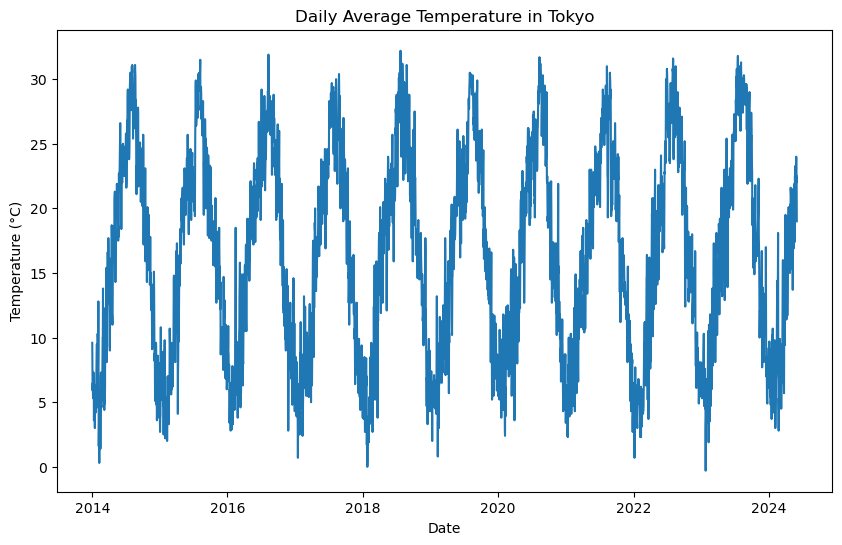

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(tokyo_data.index, tokyo_data['TAVG24'], label='TAVG24 over time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature in Tokyo')


In [7]:
# import os
# import glob

# folder_path = '../data/'

# files = glob.glob(os.path.join(folder_path, '*'))

# for file in files:
#     print(f'{file}')

In [8]:
cities = {
    'Amsterdam': '../data/AMSTERDAM SCHIPHOL_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Atlanta': '../data/Atlanta-Hartsfield International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Boston': '../data/Boston-Logan International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Burbank': '../data/Burbank-Glendale-Pasadena Airport _DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Chicago': '../data/Chicago OHare International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Cincinnati': '../data/Cincinnati-Northern Kentucky International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Dallas': '../data/Dallas-Fort Worth International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Essen': '../data/ESSEN_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Houston': '../data/Houston-George Bush Intercontinental Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Las Vegas': '../data/Las Vegas Mccarran Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'London': '../data/LONDON HEATHROW_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Minneapolis': '../data/Minneapolis-Saint Paul International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'New York': '../data/New York LaGuardia Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Paris': '../data/PARIS ORLY_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Philadelphia': '../data/Philadelphia International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Portland': '../data/Portland International Airport_DAILY_CLIMATE_BEST_Jan14May24.csv',
    'Sacramento': '../data/Sacramento Executive Airport_DAILY_CLIMATE_BEST_Jan14May24.csv'
}

t_max = pd.DataFrame()
t_min = pd.DataFrame()
t_avg = pd.DataFrame()

for city, file in cities.items():
    data = pd.read_csv(file)
    data['Date'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
    data = data.set_index('Date')
    
    # Convert Fahrenheit to Celsius
    if city in ['Atlanta', 'Boston', 'Chicago', 'Cincinnati', 'Dallas', 'Houston', 'Las Vegas', 'Minneapolis', 'New York', 'Philadelphia', 'Portland', 'Sacramento']:
        t_max[city] = ((data[['DAILY_MAX_TEMP']] - 32)*5.0)/9.0
        t_min[city] = ((data[['DAILY_MIN_TEMP']] - 32)*5.0)/9.0
    else:
        t_max[city] = data[['DAILY_MAX_TEMP']]
        t_min[city] = data[['DAILY_MIN_TEMP']]
    t_avg[city] = (t_max[city] + t_min[city])/2
    

t_avg['Tokyo'] = tokyo_data[['TAVG24']]
t_avg.head()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Date,,,,,,,,,,,,,,,,,,
2014-01-01,6.55,5.000000,-4.444444,60.5,-8.888889,1.666667,10.000000,6.45,13.055556,11.666667,8.5,-19.722222,-1.666667,8.45,0.000000,3.888889,8.055556,9.6
2014-01-02,7.75,3.888889,-10.000000,67.0,-12.222222,-3.888889,1.111111,7.85,8.888889,11.666667,8.6,-19.444444,-3.888889,9.75,-1.944444,4.722222,10.277778,7.3
2014-01-03,8.50,-1.944444,-13.333333,62.5,-15.555556,-11.944444,3.611111,8.60,5.833333,10.555556,8.6,-12.500000,-9.722222,11.10,-8.611111,3.888889,10.000000,5.9
2014-01-04,7.45,-1.111111,-9.722222,60.0,-3.888889,-3.888889,13.055556,8.00,10.277778,10.833333,7.4,-8.611111,-7.500000,9.95,-7.500000,1.111111,10.555556,6.5
2014-01-05,5.15,6.111111,-0.555556,62.0,-10.555556,2.222222,1.944444,6.40,10.000000,7.777778,6.6,-23.888889,3.055556,7.50,1.944444,2.777778,9.166667,5.4


Text(0, 0.5, 'Temperature (°C)')

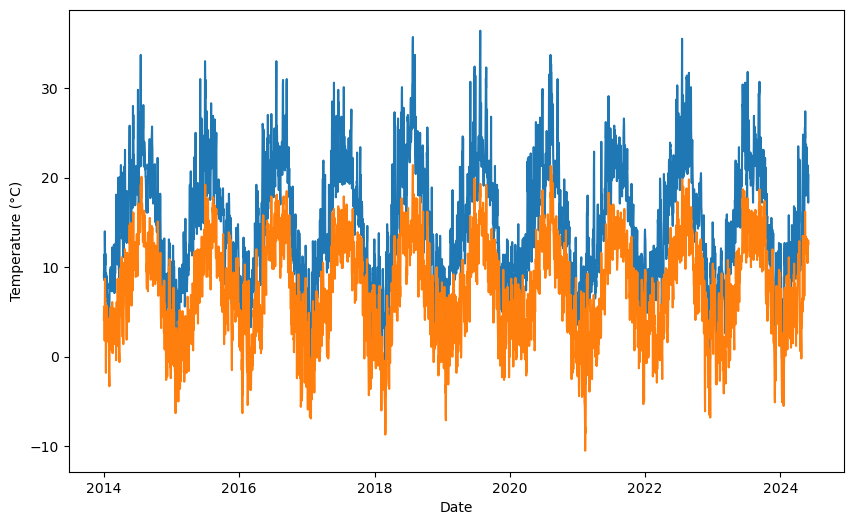

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Amsterdam'], label='Amsterdam')
plt.plot(t_min.index, t_min['Amsterdam'], label='Amsterdam')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

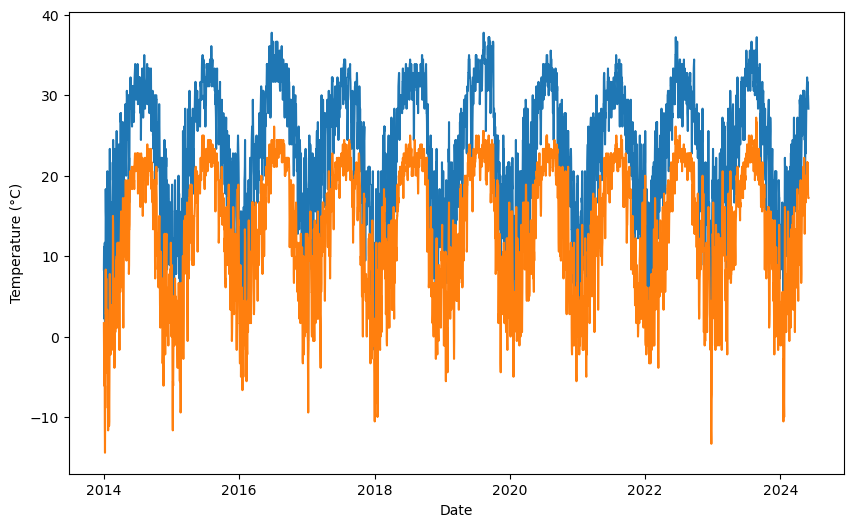

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(t_max.index, t_max['Atlanta'], label='Atlanta')
plt.plot(t_min.index, t_min['Atlanta'], label='Atlanta')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

In [11]:
correlation = t_avg.corr()
correlation

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Amsterdam,1.000000,0.744674,0.789553,0.664613,0.778784,0.754198,0.752024,0.973108,0.722036,0.793299,0.941890,0.783552,0.794950,0.938696,0.791008,0.774556,0.772974,0.812110
Atlanta,0.744674,1.000000,0.862837,0.604199,0.878280,0.933894,0.858713,0.739625,0.893912,0.777908,0.754837,0.837025,0.893848,0.752719,0.911518,0.749937,0.745874,0.815253
Boston,0.789553,0.862837,1.000000,0.677924,0.870341,0.878949,0.815862,0.772147,0.806387,0.809896,0.796760,0.838464,0.979350,0.785786,0.962412,0.794454,0.781060,0.851493
Burbank,0.664613,0.604199,0.677924,1.000000,0.646286,0.611308,0.646922,0.647441,0.593785,0.843624,0.676287,0.675937,0.679862,0.669607,0.674431,0.794184,0.864757,0.735854
Chicago,0.778784,0.878280,0.870341,0.646286,1.000000,0.950497,0.902561,0.767766,0.870268,0.812051,0.783357,0.953103,0.897503,0.781581,0.894876,0.792848,0.773862,0.847449
Cincinnati,0.754198,0.933894,0.878949,0.611308,0.950497,1.000000,0.893944,0.746229,0.892466,0.781912,0.763178,0.894225,0.911513,0.758898,0.922311,0.762471,0.747410,0.822832
Dallas,0.752024,0.858713,0.815862,0.646922,0.902561,0.893944,1.000000,0.743550,0.942468,0.821201,0.764085,0.887076,0.837343,0.764477,0.838398,0.779693,0.768840,0.826958
Essen,0.973108,0.739625,0.772147,0.647441,0.767766,0.746229,0.743550,1.000000,0.717281,0.783077,0.930999,0.772781,0.777759,0.950863,0.775583,0.765573,0.760923,0.798063
Houston,0.722036,0.893912,0.806387,0.593785,0.870268,0.892466,0.942468,0.717281,1.000000,0.777992,0.736173,0.836057,0.831385,0.740945,0.836127,0.737263,0.735116,0.799448
Las Vegas,0.793299,0.777908,0.809896,0.843624,0.812051,0.781912,0.821201,0.783077,0.777992,1.000000,0.802774,0.844228,0.815984,0.805554,0.817614,0.878821,0.923826,0.861592


## Test Normality of difference of Temperature
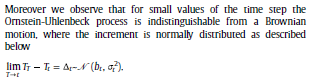



In [12]:
t_change = t_avg.diff().round(2)
t_change.dropna(inplace=True)
t_change.head()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Date,,,,,,,,,,,,,,,,,,
2014-01-02,1.20,-1.11,-5.56,6.5,-3.33,-5.56,-8.89,1.40,-4.17,0.00,0.10,0.28,-2.22,1.30,-1.94,0.83,2.22,-2.3
2014-01-03,0.75,-5.83,-3.33,-4.5,-3.33,-8.06,2.50,0.75,-3.06,-1.11,0.00,6.94,-5.83,1.35,-6.67,-0.83,-0.28,-1.4
2014-01-04,-1.05,0.83,3.61,-2.5,11.67,8.06,9.44,-0.60,4.44,0.28,-1.20,3.89,2.22,-1.15,1.11,-2.78,0.56,0.6
2014-01-05,-2.30,7.22,9.17,2.0,-6.67,6.11,-11.11,-1.60,-0.28,-3.06,-0.80,-15.28,10.56,-2.45,9.44,1.67,-1.39,-1.1
2014-01-06,5.10,-5.83,6.39,0.5,-12.22,-15.28,-6.39,2.00,-10.28,0.00,1.05,-3.61,-0.56,3.05,0.56,0.00,-0.56,-0.1


In [13]:
t_change.describe()

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,0.002603,0.004715,0.005993,0.001315,0.007097,0.004365,0.003710,0.002169,0.002842,0.005717,0.001288,0.009863,0.005788,0.001591,0.004933,0.003723,0.004391,0.002472
std,2.077268,2.729010,3.580863,3.349334,3.622468,3.573483,3.303398,2.254903,2.980979,2.117375,1.991935,3.584668,3.271279,2.207829,3.296098,2.142617,1.905066,2.121911
min,-8.500000,-11.670000,-13.060000,-17.000000,-14.720000,-15.280000,-14.720000,-10.100000,-14.440000,-10.830000,-10.200000,-15.280000,-13.610000,-10.200000,-15.560000,-9.720000,-8.610000,-11.900000
25%,-1.250000,-1.110000,-2.220000,-2.000000,-1.940000,-1.940000,-1.390000,-1.350000,-1.110000,-1.110000,-1.250000,-1.940000,-1.940000,-1.400000,-1.940000,-1.390000,-1.110000,-1.200000
50%,-0.050000,0.280000,0.000000,0.000000,0.280000,0.280000,0.280000,0.000000,0.280000,0.280000,0.150000,0.280000,0.280000,0.000000,0.280000,0.000000,0.000000,0.200000
75%,1.275000,1.670000,2.220000,2.000000,2.220000,1.940000,1.940000,1.450000,1.390000,1.390000,1.350000,2.220000,2.220000,1.450000,1.940000,1.390000,1.110000,1.400000
max,8.550000,10.830000,16.940000,15.500000,12.500000,13.330000,13.060000,10.050000,13.610000,6.670000,6.200000,13.890000,11.940000,9.100000,11.940000,8.330000,6.390000,8.000000


count    258.000000
mean      14.740310
std       14.202756
min        1.000000
25%        3.000000
50%        9.000000
75%       24.750000
max       53.000000
Name: count, dtype: float64
count     74.000000
mean      51.391892
std       64.124839
min        1.000000
25%        7.250000
50%       23.000000
75%       68.750000
max      235.000000
Name: count, dtype: float64
count     87.000000
mean      43.712644
std       44.316753
min        1.000000
25%        5.500000
50%       25.000000
75%       74.500000
max      153.000000
Name: count, dtype: float64
count     54.000000
mean      70.425926
std       85.763079
min        1.000000
25%        5.000000
50%       28.000000
75%      129.250000
max      274.000000
Name: count, dtype: float64
count     93.000000
mean      40.892473
std       45.876598
min        1.000000
25%        5.000000
50%       20.000000
75%       60.000000
max      157.000000
Name: count, dtype: float64
count     96.000000
mean      39.614583
std       47.905910


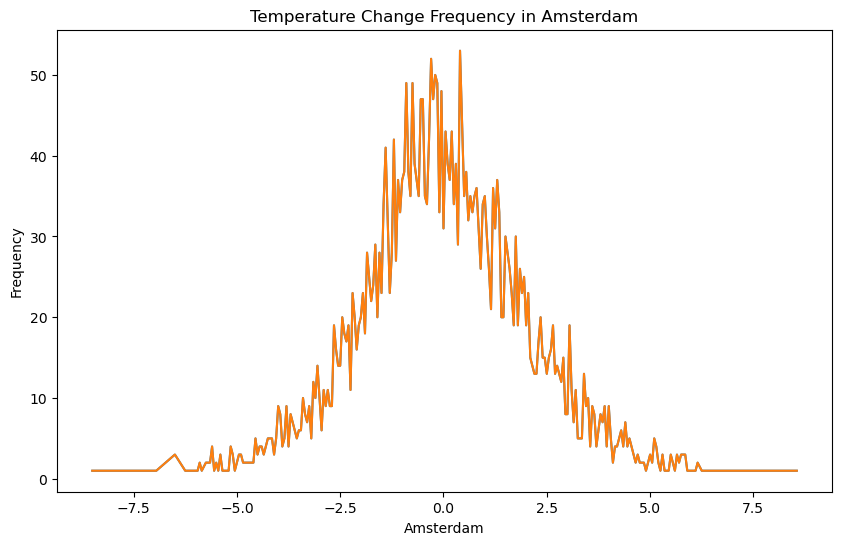

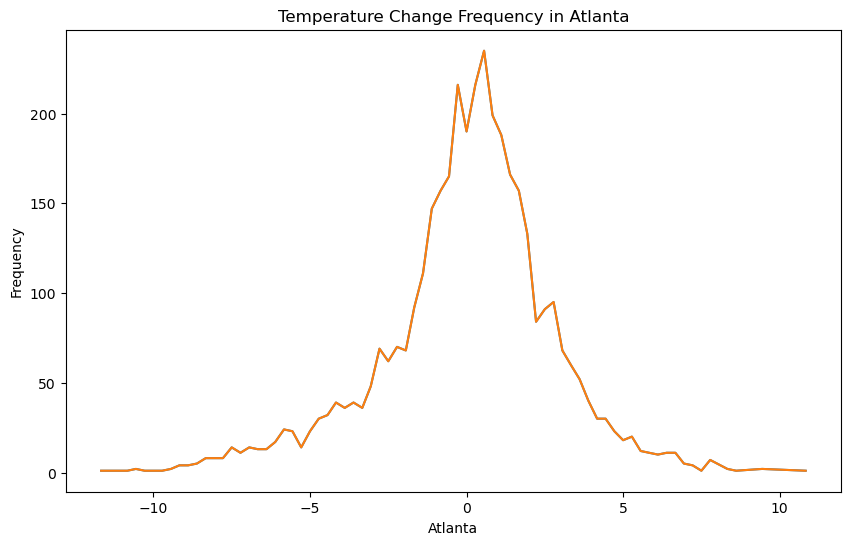

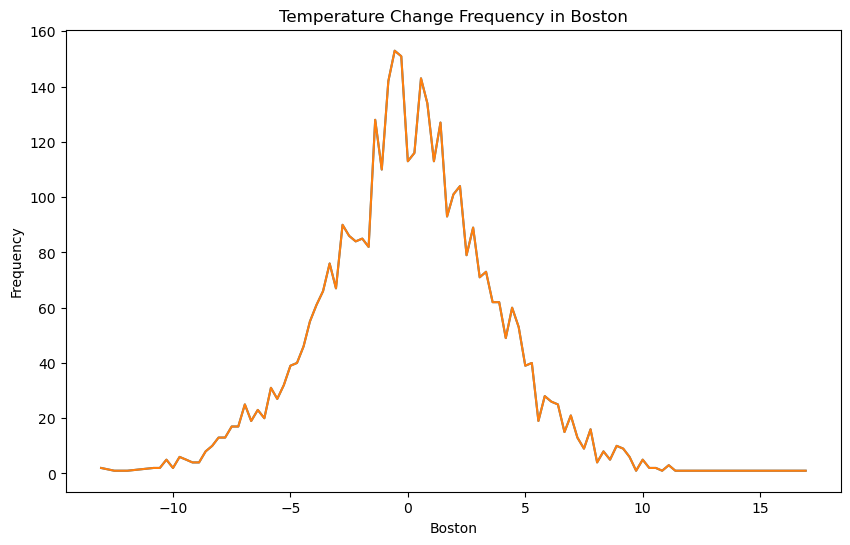

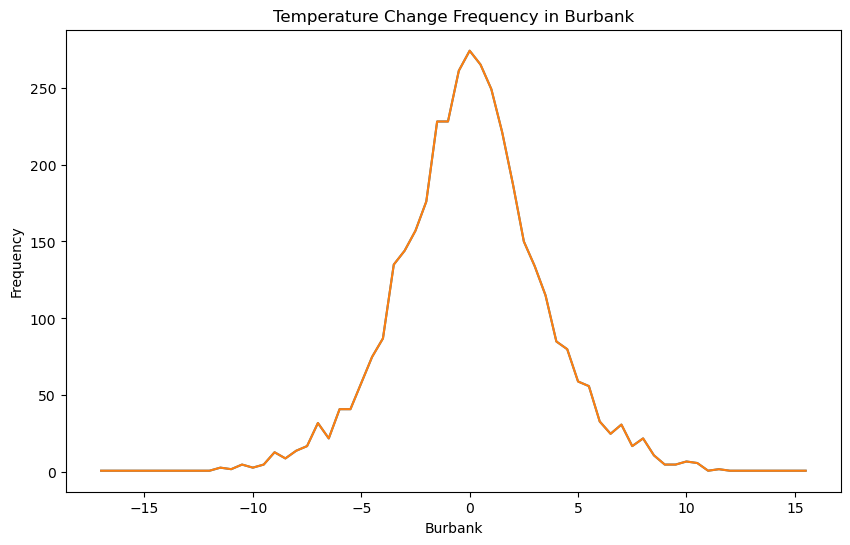

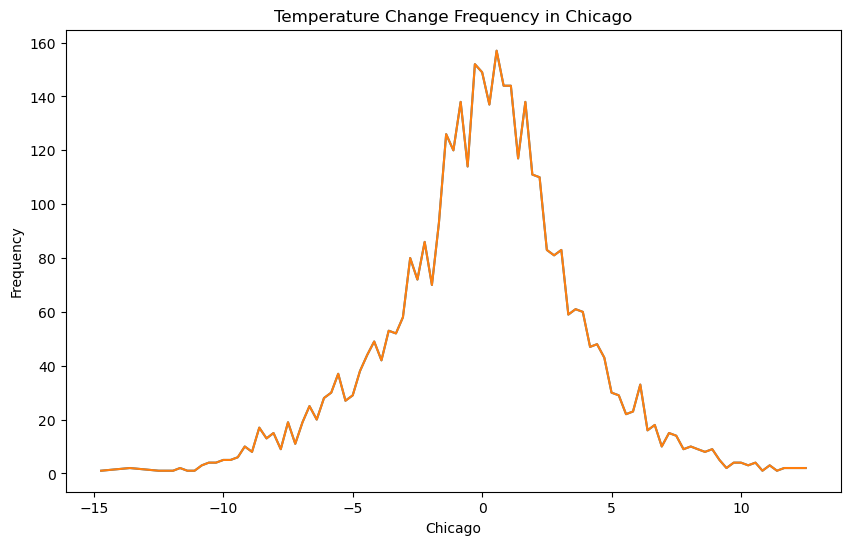

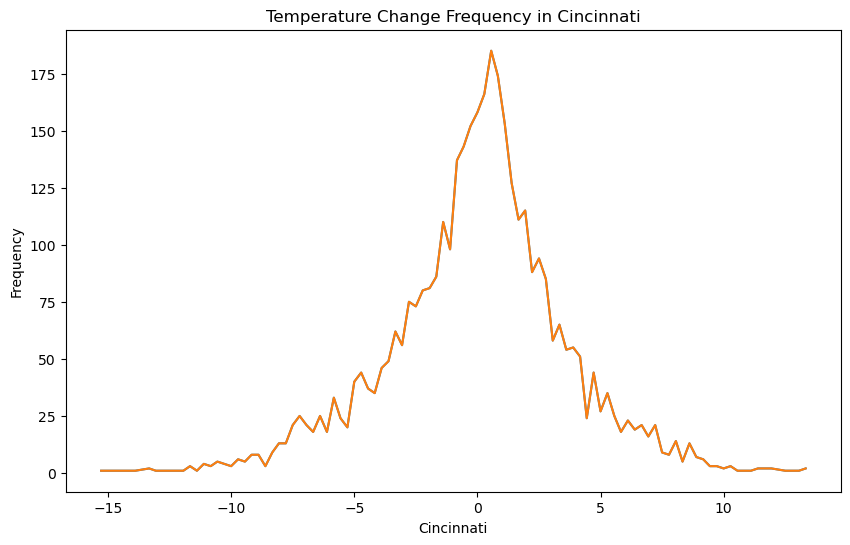

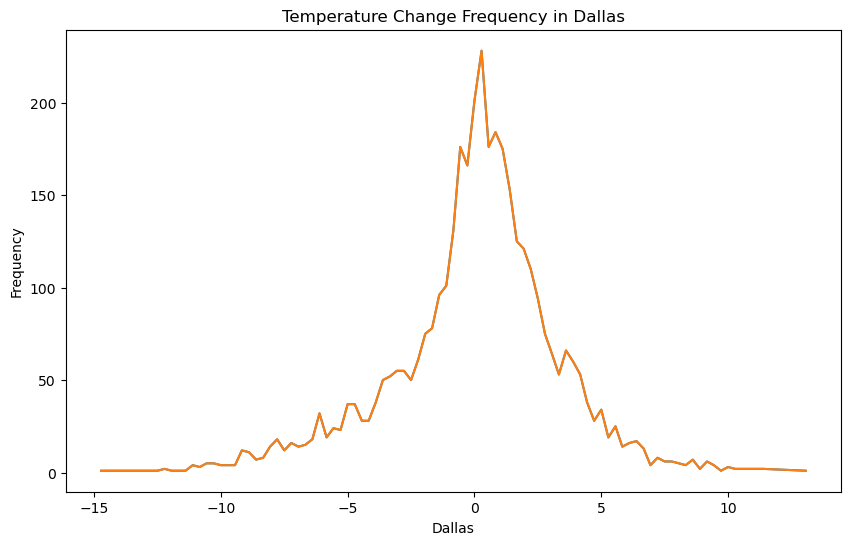

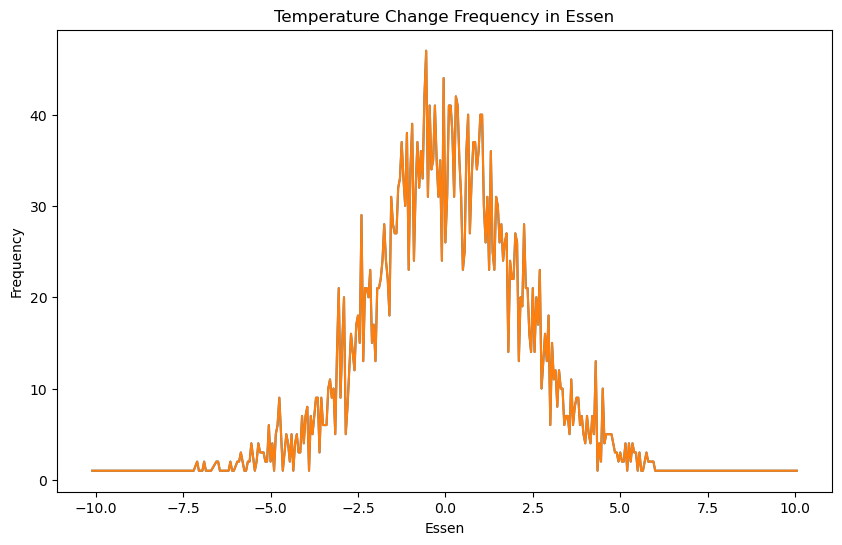

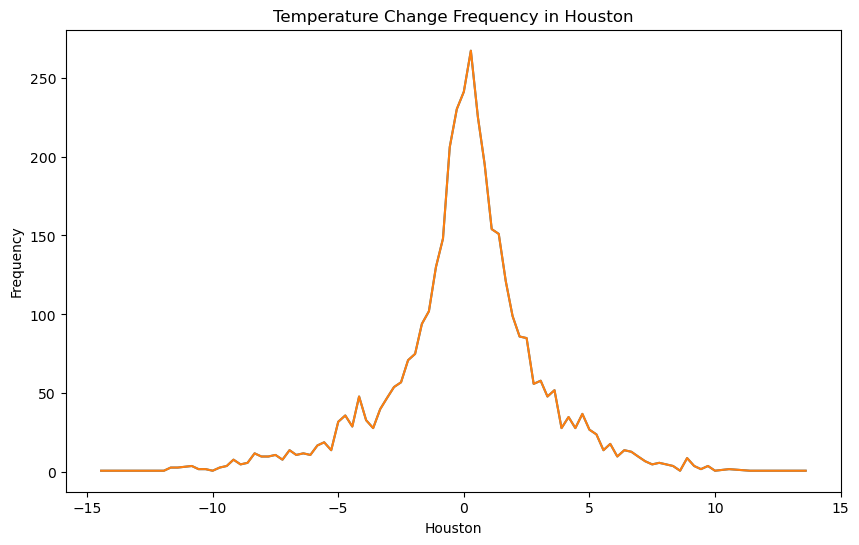

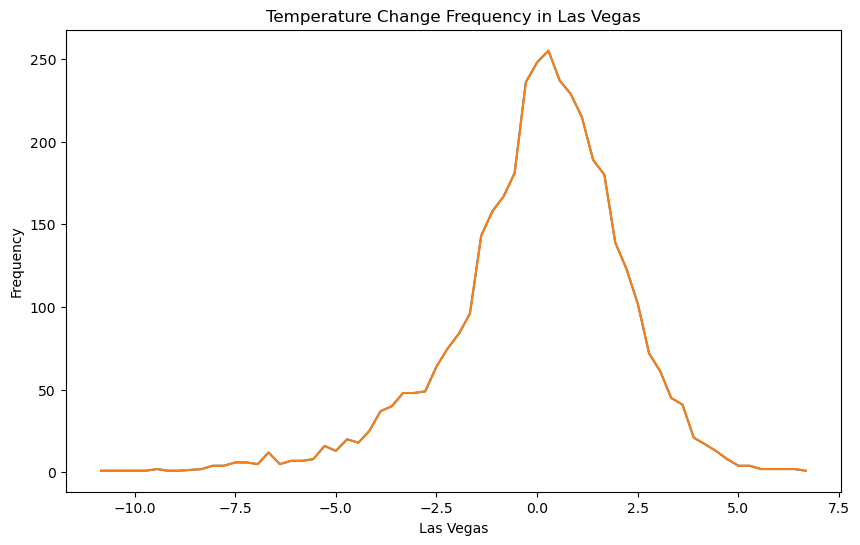

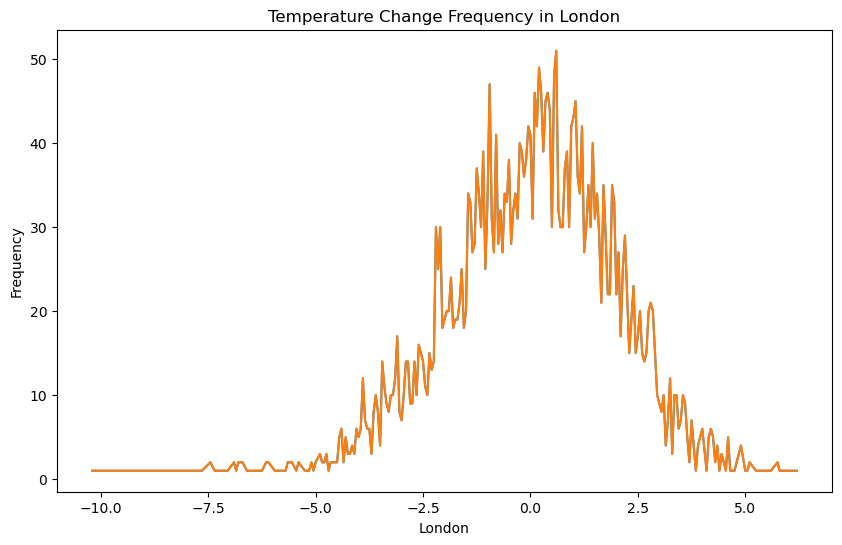

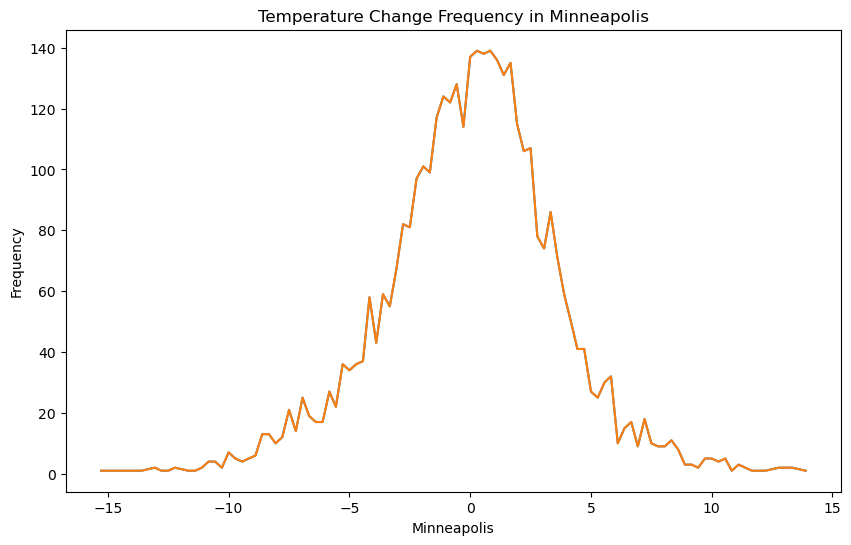

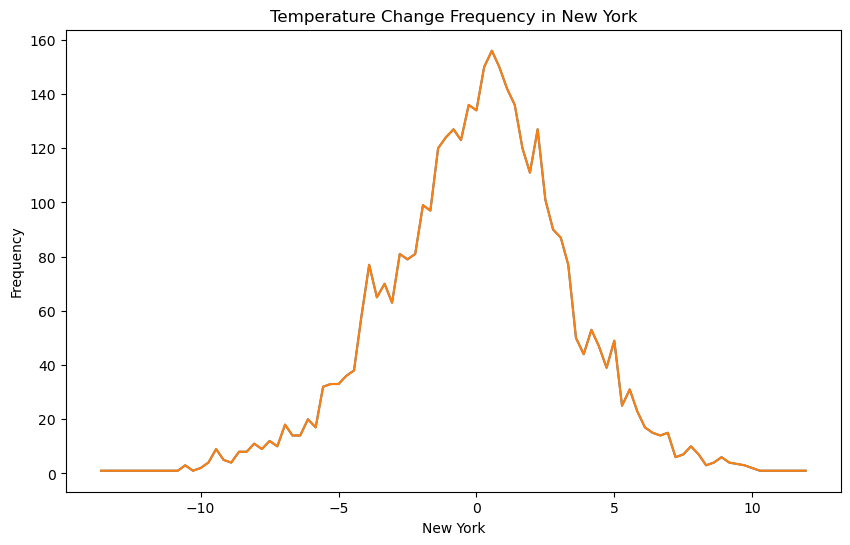

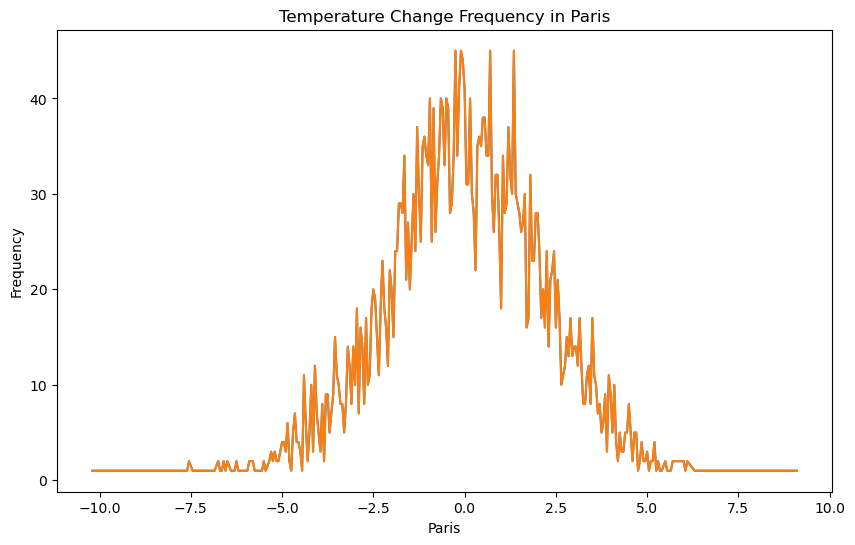

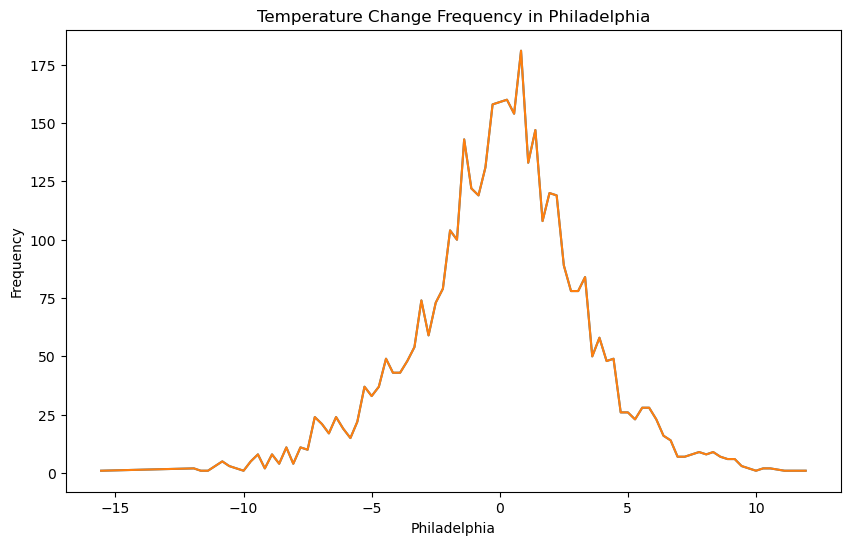

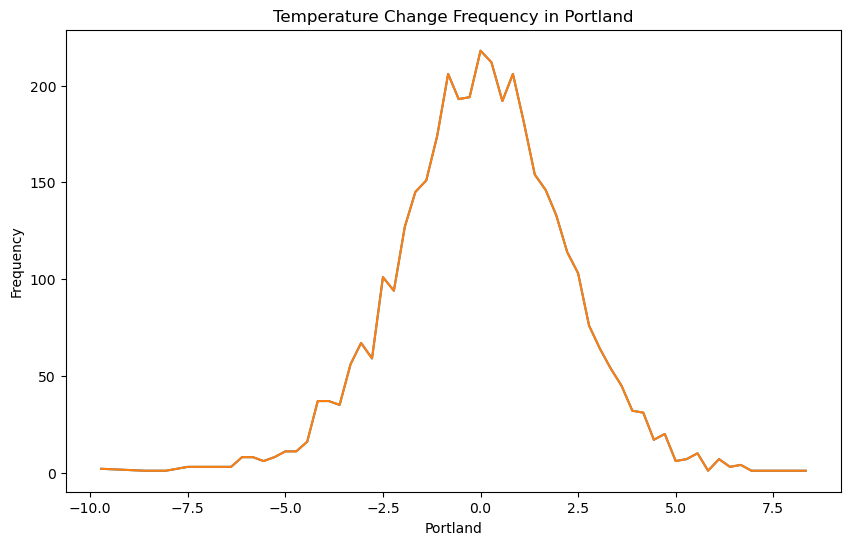

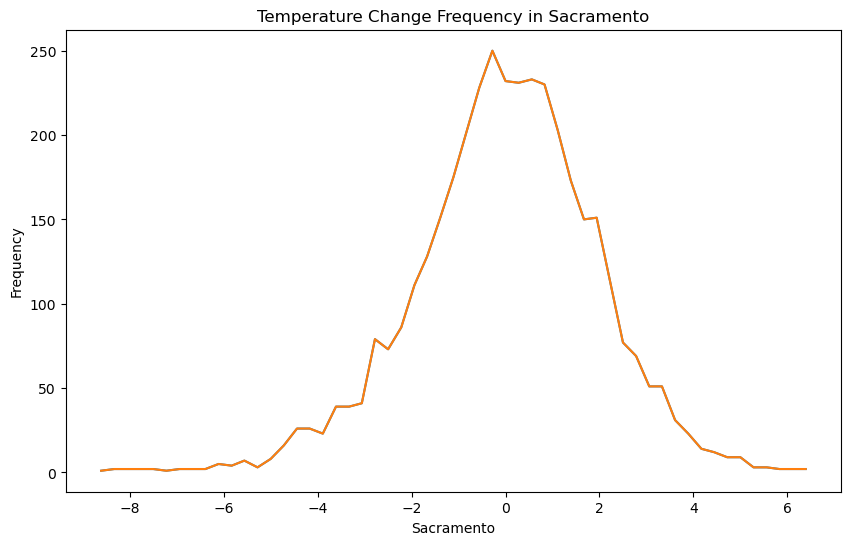

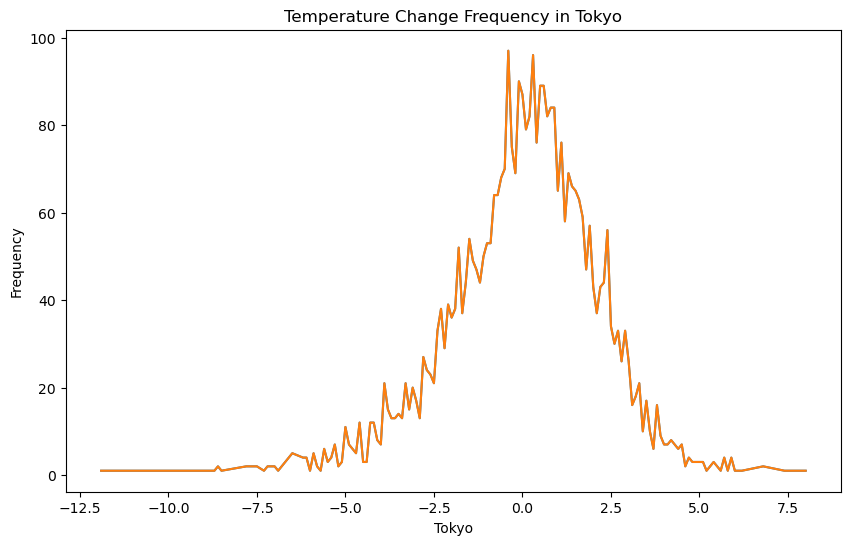

In [14]:
for city in t_change.columns:
    t_change_counts = pd.Series(t_change[city]).value_counts().sort_index()
    print(t_change_counts.describe())
    plt.figure(figsize=(10, 6))
    plt.plot(t_change_counts.index, t_change_counts.values)
    plt.xlabel('Temperature Change (°C)')
    plt.ylabel('Frequency')
    t_change_counts.plot()
    plt.title(f'Temperature Change Frequency in {city}')

In [15]:
for city in t_change.columns:
    t_statistic, p_value = stats.ttest_1samp(t_change[city], 0)
    print(f'{city}: t-statistic = {t_statistic}, p-value = {p_value}')
    kurtosis_value = stats.kurtosis(t_change[city])
    skewness_value = stats.skew(t_change[city])
    print(f'{city}: Kurtosis = {kurtosis_value}, Skewness = {skewness_value}')
    print('')

Amsterdam: t-statistic = 0.07728219669754981, p-value = 0.9384031200366449
Amsterdam: Kurtosis = 0.7230435495115577, Skewness = 0.05693902755266176

Atlanta: t-statistic = 0.10653984593703646, p-value = 0.9151596636658901
Atlanta: Kurtosis = 1.311713131194586, Skewness = -0.524520257689656

Boston: t-statistic = 0.1032032800138186, p-value = 0.9178070797036872
Boston: Kurtosis = 0.40240229584130915, Skewness = -0.012747389546287171

Burbank: t-statistic = 0.024207409800248054, p-value = 0.9806884380643941
Burbank: Kurtosis = 0.9375815478573362, Skewness = -0.012274602399239866

Chicago: t-statistic = 0.12081897125630052, p-value = 0.9038408075815013
Chicago: Kurtosis = 0.7437352468134493, Skewness = -0.15949366281388586

Cincinnati: t-statistic = 0.07532743763132854, p-value = 0.9399581544935791
Cincinnati: Kurtosis = 1.0266526617835678, Skewness = -0.19282530011865365

Dallas: t-statistic = 0.06926326321778352, p-value = 0.9447837096355438
Dallas: Kurtosis = 1.4153884493471987, Skewne

In [16]:
for city in t_change.columns:
    
    # Fit Gaussian Distribution
    params_gaussian = norm.fit(t_change[city])
    log_likelihood_gaussian = np.sum(norm.logpdf(t_change[city], *params_gaussian))
    aic_gaussian = 2*len(params_gaussian) - 2*log_likelihood_gaussian
    bic_gaussian = np.log(len(t_change[city]))*len(params_gaussian) - 2*log_likelihood_gaussian
    print(f'{city}: Gaussian AIC = {aic_gaussian}, BIC = {bic_gaussian}')
    
    # Fit Gumbel Distribution
    params_gumbel = gumbel_r.fit(t_change[city])
    log_likelihood_gumbel = np.sum(gumbel_r.logpdf(t_change[city], *params_gumbel))
    aic_gumbel = 2*len(params_gumbel) - 2*log_likelihood_gumbel
    bic_gumbel = np.log(len(t_change[city]))*len(params_gumbel) - 2*log_likelihood_gumbel
    print(f'{city}: Gumbel AIC = {aic_gumbel}, BIC = {bic_gumbel}')
    
    # Fit Student's t Distribution
    params_t = t.fit(t_change[city])
    log_likelihood_t = np.sum(t.logpdf(t_change[city], *params_t))
    aic_t = 2*len(params_t) - 2*log_likelihood_t
    bic_t = np.log(len(t_change[city]))*len(params_t) - 2*log_likelihood_t
    print(f'{city}: Student\'s t AIC = {aic_t}, BIC = {bic_t}')
    
    print('')


Amsterdam: Gaussian AIC = 16355.840546931806, BIC = 16368.327637947663
Amsterdam: Gumbel AIC = 17131.48699513347, BIC = 17143.974086149326
Amsterdam: Student's t AIC = 16295.751994244658, BIC = 16314.482630768443

Atlanta: Gaussian AIC = 18431.404539355623, BIC = 18443.89163037148
Atlanta: Gumbel AIC = 19820.688858252346, BIC = 19833.175949268203
Atlanta: Student's t AIC = 18192.0819931925, BIC = 18210.812629716285

Boston: Gaussian AIC = 20497.688342619585, BIC = 20510.175433635442
Boston: Gumbel AIC = 21218.030178574663, BIC = 21230.51726959052
Boston: Student's t AIC = 20477.3025017815, BIC = 20496.033138305287

Burbank: Gaussian AIC = 19989.28754610318, BIC = 20001.774637119037
Burbank: Gumbel AIC = 20915.4933840074, BIC = 20927.980475023258
Burbank: Student's t AIC = 19902.309995326286, BIC = 19921.04063185007

Chicago: Gaussian AIC = 20585.552089459932, BIC = 20598.03918047579
Chicago: Gumbel AIC = 21539.556746254042, BIC = 21552.0438372699
Chicago: Student's t AIC = 20499.719977

In [17]:
change_correlation = t_change.corr()
change_correlation

,Amsterdam,Atlanta,Boston,Burbank,Chicago,Cincinnati,Dallas,Essen,Houston,Las Vegas,London,Minneapolis,New York,Paris,Philadelphia,Portland,Sacramento,Tokyo
Amsterdam,1.000000,0.017067,0.005686,-0.003313,0.008997,0.001646,0.017626,0.737894,0.004974,0.020366,0.502211,0.034753,-0.002262,0.493059,-0.001081,-0.006553,0.020904,0.022835
Atlanta,0.017067,1.000000,0.253153,-0.025796,0.155381,0.452957,0.101813,0.012037,0.347745,-0.136339,-0.000263,-0.070628,0.351793,-0.012080,0.402484,0.023503,-0.050364,-0.007568
Boston,0.005686,0.253153,1.000000,0.003520,-0.050352,0.168345,-0.019590,-0.008804,0.080921,-0.044942,-0.005740,-0.233919,0.812467,-0.017104,0.701515,0.019465,-0.005455,-0.004079
Burbank,-0.003313,-0.025796,0.003520,1.000000,-0.102988,-0.067650,-0.116675,-0.027459,-0.074008,0.258531,0.016509,-0.079942,-0.007712,-0.007046,0.008740,0.152694,0.274614,-0.015259
Chicago,0.008997,0.155381,-0.050352,-0.102988,1.000000,0.581065,0.409262,0.030596,0.326248,-0.042823,-0.017631,0.488146,0.005934,0.017270,-0.032093,-0.003382,-0.044714,0.026185
Cincinnati,0.001646,0.452957,0.168345,-0.067650,0.581065,1.000000,0.371840,0.014807,0.454874,-0.116797,-0.005050,0.141063,0.285105,0.010581,0.296257,0.018733,-0.050041,0.009977
Dallas,0.017626,0.101813,-0.019590,-0.116675,0.409262,0.371840,1.000000,0.025002,0.599000,0.004596,0.023111,0.271151,0.007453,0.041016,-0.033083,-0.059608,-0.068376,0.021514
Essen,0.737894,0.012037,-0.008804,-0.027459,0.030596,0.014807,0.025002,1.000000,0.005223,-0.002159,0.452470,0.021185,-0.021259,0.556049,-0.023632,0.004467,-0.005511,0.021731
Houston,0.004974,0.347745,0.080921,-0.074008,0.326248,0.454874,0.599000,0.005223,1.000000,-0.068405,0.016147,0.080276,0.140311,0.022868,0.113938,-0.045329,-0.075801,0.003947
Las Vegas,0.020366,-0.136339,-0.044942,0.258531,-0.042823,-0.116797,0.004596,-0.002159,-0.068405,1.000000,0.029114,0.021895,-0.071085,0.010259,-0.070445,0.022287,0.195972,-0.001762


# Heatmap of Temperature Correlation

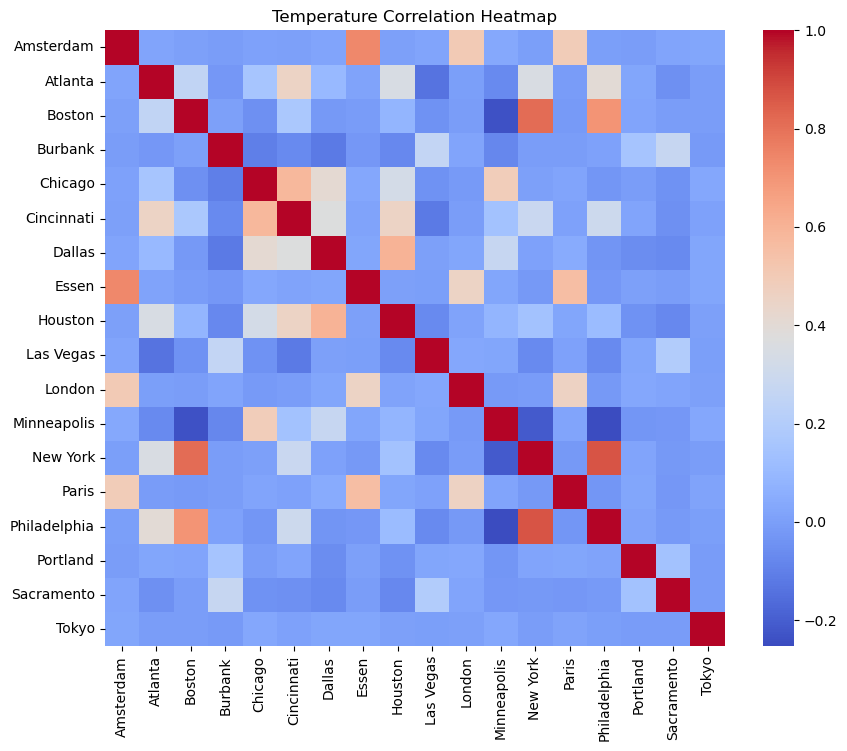

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(change_correlation, annot= False, cmap='coolwarm')
plt.title('Temperature Correlation Heatmap')
plt.show()

In [19]:
# Fit AR model with seasonal component

# for city in t_avg.columns:
#     model = sm.tsa.statespace.SARIMAX(t_avg[city], order=(3, 1, 1), seasonal_order=(3, 1, 1, 12))
#     results = model.fit()
#     print(results.summary())
#     print('')

# Heatmap of temperature change correlation
# Seasonal component - Refer to the book for the cosine function
# White noise
# Check the contract for the pricing
    